# 데이터 모델링

In [5]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.graph_objs as go 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
import numpy as np
%matplotlib inline
sns.set_style("darkgrid")

In [7]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline


# 사용자 운영체제 확인
import platform
platform.system()

'Windows'

In [8]:
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [9]:
from scipy.stats import chi2_contingency

In [10]:
df1 = pd.read_csv("C:/Users/sweet/OneDrive/바탕 화면/국민건강보험공단_진료내역정보_20191231/T20_2019_1백만.1.csv",encoding='euc-kr')
df2 = pd.read_csv("C:/Users/sweet/OneDrive/바탕 화면/국민건강보험공단_진료내역정보_20191231/T20_2019_1백만.2.csv",encoding='euc-kr')
df3 = pd.read_csv("C:/Users/sweet/OneDrive/바탕 화면/국민건강보험공단_진료내역정보_20191231/T20_2019_1백만.3.csv",encoding='euc-kr')
df = pd.concat([df1, df2, df3])

In [11]:
# 모데링 - 필요 데이터만 추출
df_train = df[['성별코드', '연령대코드', '시도코드', '서식코드', '진료과목코드', '주상병코드', '부상병코드', '심결가산율']].copy()
# 서식코드 0(미입원) , 1(입원) 주,부상병코드 맨 앞자리 알파벳만 추출
df_train['서식코드'] = df_train['서식코드'].apply(lambda x: 1 if x == 2 else 0) 
df_train['주상병코드'] = df_train['주상병코드'].apply(lambda x: x[:1])
df_train['부상병코드'] = df_train['부상병코드'].apply(lambda x: x[:1])

# 주, 부상병코드 알파벳 인덱싱 
eng_list = ['A','B','C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
code_dict = dict(zip(eng_list, [i for i in range(len(eng_list))]))
df_train['주상병코드'] = df_train['주상병코드'].apply(lambda x: code_dict[x])
df_train['부상병코드'] = df_train['부상병코드'].apply(lambda x: code_dict[x])

# 심결가산율 카테고리화 및 인덱싱
rate_list = pd.DataFrame(df['심결가산율'].value_counts()).index
rate_list = sorted(rate_list)
rate_dict = dict(zip(rate_list, [i for i in range(len(rate_list))]))
df_train['심결가산율'] = df_train['심결가산율'].apply(lambda x: rate_dict[x])

In [12]:
for i in df_train.columns:
    df_train[i] = df_train[i].astype('category')

In [13]:
df_train.dtypes

성별코드      category
연령대코드     category
시도코드      category
서식코드      category
진료과목코드    category
주상병코드     category
부상병코드     category
심결가산율     category
dtype: object

In [14]:
df_train.head(3)

,성별코드,연령대코드,시도코드,서식코드,진료과목코드,주상병코드,부상병코드,심결가산율
0,2,12,46,0,5,12,12,3
1,2,12,46,0,1,4,13,3
2,2,12,46,0,1,13,4,3


* 실패

In [50]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

In [51]:
# 표준화
data1 = minmax_scale(df_train)
data2 = scale(df_train)

In [61]:
# original
sns.jointplot(df_train.진료과목코드, df_train[:,6])
plt.show()

TypeError: '(slice(None, None, None), 6)' is an invalid key

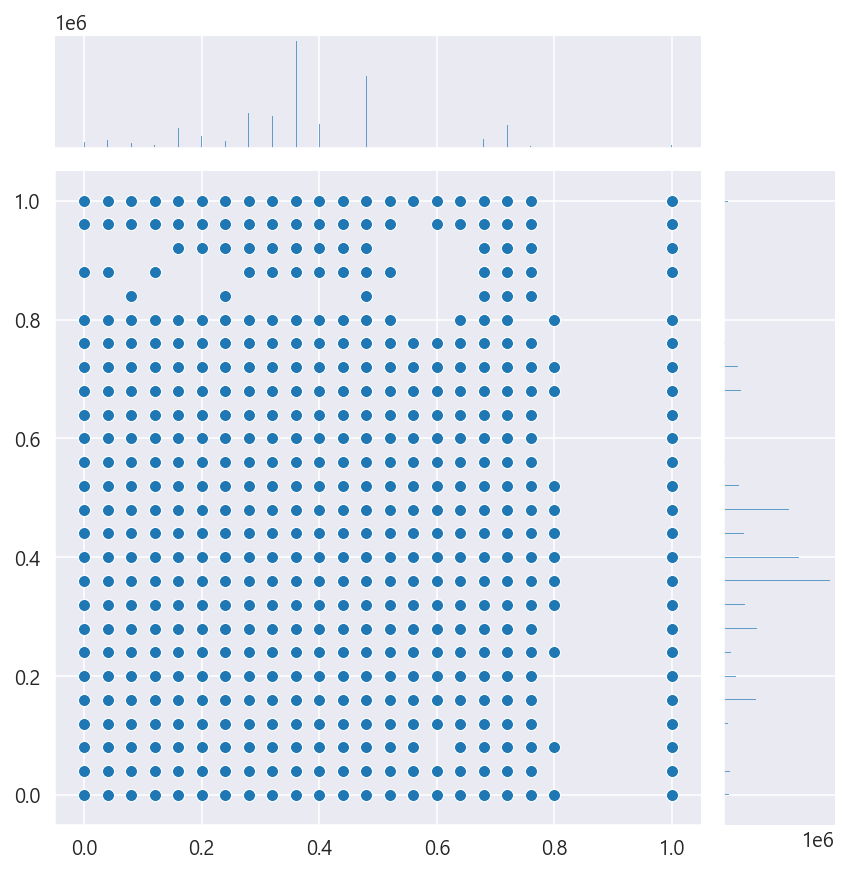

In [ ]:
# minmax
sns.jointplot(data1[:,5], data1[:,6])
plt.show()

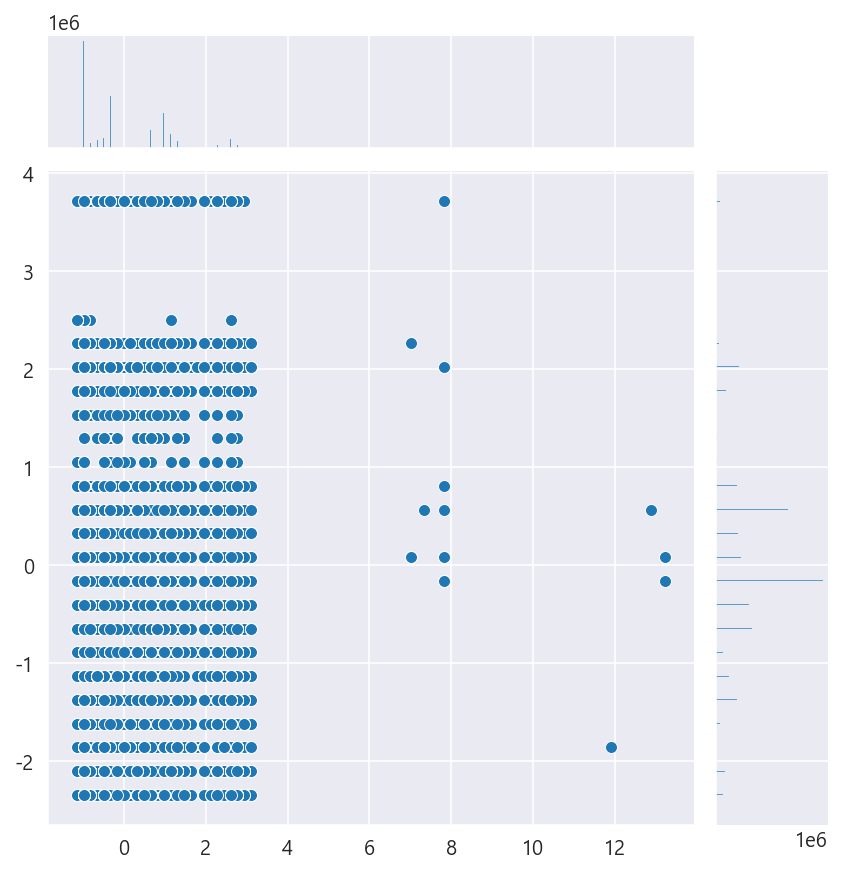

In [30]:
# scale
sns.jointplot(data2[:,5], data2[:,6])
plt.show()

In [31]:
# 정규화
from sklearn.preprocessing import scale, normalize
y1 = scale(df_train)
y2 = normalize(df_train)

In [23]:
print("original x:\n", data1)
print("scale:\n", y1)
print("norms (scale)\n", np.linalg.norm(y1, axis=1))
print("normailze:\n", y2)
print("norms (normalize)\n", np.linalg.norm(y2, axis=1))

original x:
 [[1.         0.64705882 0.92105263 ... 0.48       0.48       0.75      ]
 [1.         0.64705882 0.92105263 ... 0.16       0.52       0.75      ]
 [1.         0.64705882 0.92105263 ... 0.52       0.16       0.75      ]
 ...
 [1.         0.         0.94736842 ... 0.28       0.6        0.75      ]
 [1.         0.         0.94736842 ... 0.6        0.6        0.75      ]
 [1.         0.         0.94736842 ... 0.36       0.36       0.25      ]]
scale:
 [[ 0.87944496  0.35185335  0.95777235 ...  0.56426101  0.60249328
   1.7998549 ]
 [ 0.87944496  0.35185335  0.95777235 ... -1.37655488  0.85722052
   1.7998549 ]
 [ 0.87944496  0.35185335  0.95777235 ...  0.80686299 -1.43532468
   1.7998549 ]
 ...
 [ 0.87944496 -1.87445866  1.03631955 ... -0.64874892  1.36667501
   1.7998549 ]
 [ 0.87944496 -1.87445866  1.03631955 ...  1.29206696  1.36667501
   1.7998549 ]
 [ 0.87944496 -1.87445866  1.03631955 ... -0.16354495 -0.16168846
  -0.50331869]]
norms (scale)
 [2.42182176 2.94421209 2.958

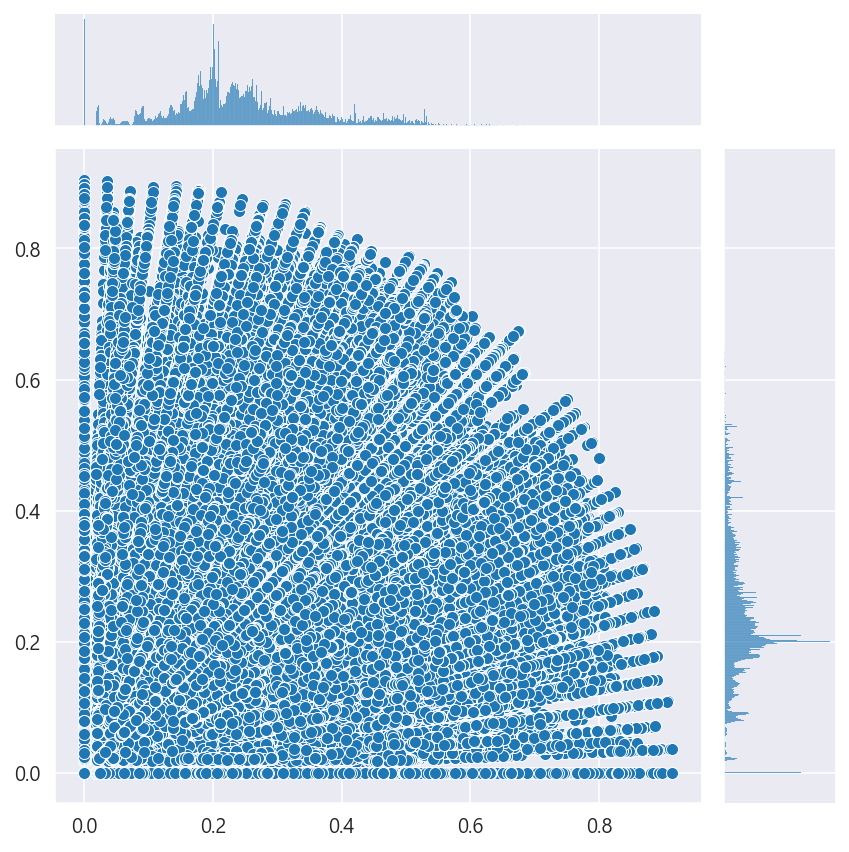

In [62]:
sns.jointplot(y2[:, 5], y2[:, 6])
plt.show()

## kNN

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

### kNN = 3 으로 적용

In [14]:
column_train = ['성별코드', '연령대코드', '시도코드', '진료과목코드', '주상병코드',	'부상병코드', '심결가산율']
neigh_3 = KNeighborsClassifier(n_neighbors=3, weights='distance')

In [15]:
neigh_3_train = neigh_3.fit(df_train[column_train], df_train['서식코드'])

new_data_1 = [2, 12, 46, 1, 13, 4, 3]

In [ ]:
neigh_3_class = neigh_3_train.preidict(new_data_1)

In [ ]:
print(neigh_3_class)

### kNN = 7 로 적용

In [ ]:
neigh_7 = KNeighborsClassifier(n_neighbors= 7, weights= 'distance')

In [ ]:
neigh_7_train = neigh_7.fit(df_train[column_train], df_train['서식코드'])

In [ ]:
neigh_7_class = neigh_7_train.preidict(new_data_1)

In [ ]:
print(neigh_7_class)

### accuracy 평가

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_train, test_size=0.33)

In [ ]:
neigh3 = KNeighborsClassifier(n_neighbors=3, weights='distance')
neigh3.fit(X_train, y_train)

In [ ]:
print('-----------------3개의 이웃 데이터----------------')
print(classification_report(y_test, neigh3.predict(X_test)))

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
multinomial_model = MultinomialNB()
multinomial_model

In [ ]:
multinomial_model.fit(df_train[column_train], df_train['서식코드'])

In [ ]:
multinomial_model.predict([[2, 12, 46, 1, 13, 4, 3]])

In [ ]:
multinomial_model.predict_proba([[2, 12, 46, 1, 13, 4, 3]])

In [ ]:
print(classification_report(y_test, multinomial_model.predict(X_test)))

In [ ]:
print(confusion_matrix(y_test, multinomial_model.predict(X_test)))

## Decision Tree

In [2]:
from sklearn import tree

In [3]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [ ]:
clf.fit(df_train[column_train], df_train['서식코드'])

In [ ]:
clf.predict([[2, 12, 46, 1, 13, 4, 3]])

## crosstab

In [10]:
# Cross tabulation between 진료과목코드 and 서식코드
CrosstabResult_1=pd.crosstab(index=df_train['서식코드'],columns=df_train['진료과목코드'])
print(CrosstabResult_1)

진료과목코드      0        1       2       3       4        5       6      7      8  \
서식코드                                                                            
0       72867  4319462  219417  323406  393159  2100772  246843  29224  13822   
1         257    68497   10714    9536   24402    39789   18446   2843   1444   

진료과목코드       9  ...      23      24    25   26  50  52  55  80  86  88  
서식코드            ...                                                     
0       194939  ...  361533  101335  2003  803   1   0  39   0   0   6  
1         1398  ...   18220   20887   238   72   9   1   3   1   1   0  

[2 rows x 33 columns]


In [11]:
# Performing Chi-sq test
ChiSqResult_1 = chi2_contingency(CrosstabResult_1)

In [12]:
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult_1[1])

The P-Value of the ChiSq Test is: 0.0


In [13]:
# Cross tabulation between 주상병코드 and 심결가산율
CrosstabResult_2=pd.crosstab(index=df_train['주상병코드'],columns=df_train['심결가산율'])
print(CrosstabResult_2)

심결가산율      0        1       2       3       4
주상병코드                                        
0        194   140556   28659   26448    6512
1        459   221494   20618   19966   11658
2         29    15766   14408   43736  106687
3         72    43865   12287   26065   29345
4       9260   439284   48667   91015   47523
5        484   256343   66752   52287   24259
6        557   102011   38245   49912   31383
7        536   953629   60663   53357   47519
8      27091   703215   63088  140540   83889
9       9811  2912352  292750  123998   31410
10      3203   566062   67234   96480   36809
11       955   591726   23865   36640   22391
12     13237  1748990  307218  137788   56616
13       831   421323   71031  122322   48880
14         0     7496   10635    2506    1954
15         0     1288    1269    1631    2669
16         0     2436    1516    3276    7036
17      1022   131916   24644   95828   46689
18       470   502799  126697   82394   14469
19       275    57091    8887   11

In [14]:
# Performing Chi-sq test
ChiSqResult_2 = chi2_contingency(CrosstabResult_2)

In [15]:
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult_2[1])

The P-Value of the ChiSq Test is: 0.0


In [16]:
# Cross tabulation between 연령대코드 and 서식코드
CrosstabResult_3=pd.crosstab(index=df_train['연령대코드'],columns=df_train['서식코드'])
print(CrosstabResult_3)

서식코드         0      1
연령대코드                
1       956751  18769
2       667681   6829
3       357583   3418
4       339827   4293
5       355993   5534
6       444040   7309
7       484296   9587
8       639504  11334
9       647405  10220
10      808001  14246
11      944417  18077
12     1118811  23349
13     1231990  25834
14     1073216  21851
15      997223  20993
16      911800  25715
17      602036  26340
18      313809  30264


In [17]:
# Performing Chi-sq test
ChiSqResult_3 = chi2_contingency(CrosstabResult_3)

In [18]:
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult_3[1])

The P-Value of the ChiSq Test is: 0.0


## 원핫인코딩

In [ ]:
# 원핫인코딩 해서 각각 연관성 돌려본 후 knn등 모델링한 것 넣기

In [ ]:
df_train.head()

In [ ]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [15]:
# 정범님 코드 참고
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data

df_train[['진료과목코드', '서식코드']]
dummy_columns = ["진료과목코드"]
df_train_dummy = dummy_data(df_train[['진료과목코드', '서식코드']], dummy_columns)

In [42]:
# 원핫인코딩
df_train_dummy = pd.get_dummies(df_train.서식코드)
df_train_dummy.head(2)

,0,1
0,1,0
1,1,0


In [43]:
# Cross tabulation between 진료과목코드 and 서식코드
CrosstabResult_1=pd.crosstab(index=df_train['진료과목코드'],columns=df_train_dummy)
print(CrosstabResult_1)

ValueError: Shape of passed values is (2, 2), indices imply (13178345, 2)

In [44]:
# Performing Chi-sq test between 진료과목코드 and 서식코드
ChiSqResult_1 = chi2_contingency(CrosstabResult_1)

In [45]:
# between 진료과목코드 and 서식코드
#  P-Value is the Probability of H0 being True 
# If P-Value>0.05 then only we Accept the assumption(H0)
print('The P-Value of the ChiSq Test is:', ChiSqResult_1[1])

The P-Value of the ChiSq Test is: 1.0


In [39]:
# Cross tabulation between 주상병코드 and 서식코드
CrosstabResult_2=pd.crosstab(index=df_train['주상병코드'],columns=df_train_dummy)
print(CrosstabResult_2)

col_0        1
주상병코드         
0       202369
1       274195
2       180626
3       111634
4       635749
5       400125
6       222108
7      1115704
8      1017823
9      3370321
10      769788
11      675577
12     2263849
13      664387
14       22591
15        6857
16       14264
17      300099
18      726829
19       81978
20         360
25      121112


In [40]:
# Performing Chi-sq test between 주상병코드 and 심결가산율
ChiSqResult_2 = chi2_contingency(CrosstabResult_2)

In [41]:
# between 주상병코드 and 심결가산율
#  P-Value is the Probability of H0 being True 
# If P-Value>0.05 then only we Accept the assumption(H0)
print('The P-Value of the ChiSq Test is:', ChiSqResult_2[1])

The P-Value of the ChiSq Test is: 1.0


In [ ]:
# 원핫인코딩에 문제가 있음. 원인찾기